In [2]:
# IMPORTS
import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline
import numpy as np
import pandas as pd
import time as time
import sys

In [3]:
# READ DATA
tic = time.time()

fname = 'NeutronCaptures_vs_xpos.txt'
data = pd.read_csv(fname,
                   sep='\t',
                   names=['NeutronCaptures', 'detA_x', 'detA_FWHM', 'detCoinc_x', 'detCoinc_FWHM'])
print('Time Elapsed: ' + str(np.round(time.time()-tic,2)) + ' s')
data

FileNotFoundError: [Errno 2] No such file or directory: 'NeutronCaptures_vs_xpos.txt'

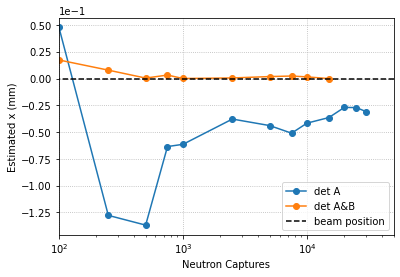

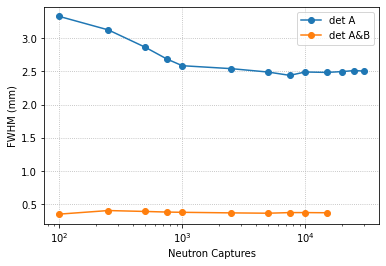

In [10]:
min_captures = 100;

NeutronCaptures = data['NeutronCaptures'].loc[data['NeutronCaptures']>=min_captures]
detA_x = data['detA_x'].loc[data['NeutronCaptures']>=min_captures]
detCoinc_x = data['detCoinc_x'].loc[data['NeutronCaptures']>=min_captures]

detA_FWHM = data['detA_FWHM'].loc[data['NeutronCaptures']>=min_captures]
detCoinc_FWHM = data['detCoinc_FWHM'].loc[data['NeutronCaptures']>=min_captures]


# ------ Estimated x ------ #
fig, ax = plt.figure(), plt.rc('axes', axisbelow=True)
plt.grid(linestyle=':')

plt.plot(NeutronCaptures,(detA_x),'o-')
plt.plot(NeutronCaptures,abs(detCoinc_x),'o-')
plt.plot([0, 1e5],np.zeros(np.shape([0, 1e5])),'k--')

plt.xlim([min_captures, 5e4])
plt.xscale('log')

plt.xlabel('Neutron Captures')
plt.ylabel('Estimated x (mm)')
plt.legend(('det A','det A&B', 'beam position'),loc='lower right')
plt.gca().ticklabel_format(axis='y', style='sci',scilimits=(0,0))

savename = 'NeutronCaptures_vs_xpos_0keV'
plt.savefig(savename, dpi=300)



# ------ FWHM ------ #
plt.figure(), plt.rc('axes', axisbelow=True)
plt.grid(linestyle=':')

plt.plot(NeutronCaptures,detA_FWHM,'o-')
plt.plot(NeutronCaptures,detCoinc_FWHM,'o-')

plt.xscale('log')
plt.xlabel('Neutron Captures')
plt.ylabel('FWHM (mm)')
plt.legend(('det A','det A&B'));

# savename = 'NeutronCaptures_vs_FWHM_0keV'
# plt.savefig(savename, dpi=300)